In [7]:
import math
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeClassifier
eps = np.finfo(float).eps
from sklearn import linear_model
from numpy import mean
from numpy import cov
from numpy import mean
from numpy import std
from numpy.linalg import eig
import pandas as pd

In [8]:
df=pd.read_csv('data.csv')

In [9]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [10]:
train_X=train.drop('xAttack',axis=1)
# train_X=(train_X-train_X.mean())/train_X.std()
M = mean(train_X, axis=0)
S = std(train_X,axis=0)
# print(M)
train_X=(train_X - M)/S
# train_X

In [11]:
mean_vec = np.mean(train_X, axis=0)
cov_mat = (train_X - mean_vec).T.dot((train_X - mean_vec)) / (train_X.shape[0]-1)

In [12]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [13]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# # Visually confirm that the list is correctly sorted by decreasing eigenvalues
# print('Eigenvalues in descending order:')
# for i in eig_pairs:
#     print(i[0])

In [14]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

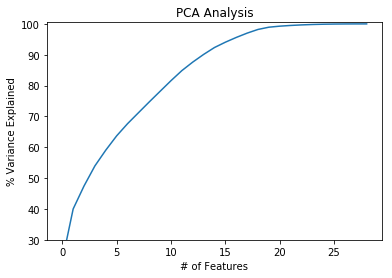

In [15]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(cum_var_exp)

In [16]:
matrix_w=np.hstack((eig_pairs[0][1].reshape(29,1),eig_pairs[1][1].reshape(29,1),eig_pairs[2][1].reshape(29,1),
                    eig_pairs[3][1].reshape(29,1),eig_pairs[4][1].reshape(29,1),
                    eig_pairs[5][1].reshape(29,1),eig_pairs[6][1].reshape(29,1),
                    eig_pairs[7][1].reshape(29,1),eig_pairs[8][1].reshape(29,1),
                    eig_pairs[9][1].reshape(29,1),eig_pairs[10][1].reshape(29,1),
                    eig_pairs[11][1].reshape(29,1),eig_pairs[12][1].reshape(29,1),eig_pairs[13][1].reshape(29,1)))
Y = train_X.dot(matrix_w)
Y

0         1         2         3         4         5         6   \
0       1.010225 -0.270090 -0.032698  0.146822  0.267846  0.574809 -0.070920   
1      -0.497135  1.119225 -0.226620  1.324804 -1.404606  2.625317 -1.416447   
3       2.107216 -1.046376  0.036961 -0.001442  0.861521 -0.240897  0.027134   
4       1.894654 -0.875897  0.164992 -1.168917  0.589940  0.265141 -0.036227   
5      -0.936989  5.534789  0.217760 -0.936600  1.107457 -1.315626  0.549716   
7      -3.764295 -1.237659 -0.069004  0.439457  0.295242 -0.035351  0.167535   
8      -4.075306 -1.201001  0.012120 -0.016848 -0.234369 -0.305421  0.198785   
9      -3.875501 -1.220076 -0.065076  0.442351  0.312859 -0.093520  0.157830   
10     -1.227881  5.611162  0.251819 -1.094580  0.860681 -1.448033  0.518199   
11     -4.051286 -1.163704 -0.037866  0.307343  0.110852 -0.172273  0.127327   
12      2.666437 -0.910184 -0.021367  0.703855  0.545668 -0.465647 -0.141060   
13      2.498210 -0.432501 -0.180384  2.171986 -1.438071 -0.217156  0.097034   
14     -4.074070 -1.186718  0.016824  0.135926 -0.168957 -0.400759  0.183976   
15     -3.645129 -1.308656 -0.046782  0.412427  0.229597 -0.179082  0.270451   
16      2.309484 -0.965309  0.056395 -0.113803  0.803060 -0.191318 -0.078718   
17      3.369698 -0.290888 -0.395534  5.341048 -3.322908 -2.520507  0.192456   
18      2.350567 -0.872146  0.057710 -0.254737  0.911955 -0.037233 -0.053050   
19      2.250817 -0.901877  0.079083 -0.324717  0.728904 -0.079446 -0.086440   
21     -4.092133 -1.173527  0.009215  0.054051 -0.259148 -0.354105  0.179778   
22      2.392964 -0.925657  0.058896 -0.155379  0.802461 -0.152449 -0.094658   
23      0.298877  1.452238 -0.509184  1.883856 -2.046015  4.105878 -0.089344   
24     -4.071411 -1.204395  0.030582  0.069134 -0.229024 -0.458657  0.203474   
25     -0.106028  0.002995 -3.731168 -0.163649  1.253417  2.159187  1.746370   
26     -4.204331 -1.127621  0.003496  0.077239 -0.202768 -0.282487  0.125519   
27      2.544892  0.616175  0.081062  0.252445  0.671000 -1.195619  0.243873   
28      1.864881 -0.860179  0.150180 -1.149386  0.818851  0.379823 -0.034567   
30      3.510038 -0.569439 -0.318564  4.604159 -2.570079 -2.073920 -0.052791   
31     -2.961078 -1.589805  0.037716  0.135739  0.206517 -0.493608  0.373151   
32      2.489999 -0.901623  0.040693 -0.085046  0.753319 -0.055580 -0.047425   
34      1.751098 -0.938166  0.410665 -2.628430 -1.275519 -0.130926  0.184209   
...          ...       ...       ...       ...       ...       ...       ...   
125936  1.905517 -0.907211  0.168893 -1.200303  0.531367  0.265848 -0.011978   
125939  1.871295 -0.859277  0.143641 -1.108358  0.876280  0.390079 -0.039571   
125942  2.338616 -0.619520  0.002607  0.442009 -0.902103  0.511482  0.123821   
125943  1.527133 -0.025739 -0.258503  1.045032 -0.298993  0.863180 -0.467973   
125944  1.983358 -0.616706 -0.186415  1.592022  0.792923 -0.179015 -0.468072   
125945  2.047032 -0.869423  0.107490 -0.754756  0.892939  0.230967 -0.047657   
125946 -3.900897 -1.297126  0.121309 -0.285018 -0.663327 -0.757698  0.294091   
125947  3.120467 -0.679678 -0.105427  1.887799 -1.367196 -0.530640  0.138619   
125948 -3.802593 -1.227128 -0.064804  0.417092  0.252583 -0.047701  0.165854   
125951  2.215012 -0.805306  0.010193  0.097523  0.778736 -0.064393 -0.064606   
125952  0.069269 -0.313741 -0.105347  0.004465  0.960181  1.168067 -0.208244   
125953 -3.352898 -1.516763  0.085393  0.037455 -0.136626 -0.787927  0.451155   
125954  2.578257 -0.935568  0.034176  0.096740  0.673705 -0.270735 -0.071504   
125955  3.083342  4.592340  0.048514  2.068529 -0.293698 -3.027119  1.004707   
125956 -0.333591  0.447500  0.056803 -0.256742  0.124200  1.458127 -2.092080   
125957  0.950570 -0.385859 -0.066887 -0.150647  1.067781  1.000284 -0.257948   
125958 -3.859742 -1.238020 -0.066675  0.433091  0.275544 -0.101241  0.212436   
125959  2.368962 -0.898983  0.054825 -0.214245  0.863906 -0.065015 -0.056017   
125960  1.8648